In [2]:
#small dataset
import numpy as np  
import pandas as pd

usptodata = pd.read_csv('U.S. Patents.csv')
usptodataset=usptodata[["grant_id","claims_text","abstract"]]
usptodataset= usptodata.dropna()
US_Patent_df = usptodataset.reset_index(drop=True)
US_Patent_df= US_Patent_df[['grant_id','abstract']]
US_Patent_df

,grant_id,abstract
0,USPP030977,"A new and distinct variety of Mango plant, her..."
1,USPP030978,&#x2018;Honeysuckle Rose #1-6&#x2019; is a new...
2,USPP030979,"A new and distinct peach tree variety, <i>Prun..."
3,USPP030980,This invention relates to a new and distinct v...
4,USPP030981,A new and distinct cultivar of Strawberry plan...
...,...,...
7008,US10462947,Provided are a first component holding tool op...
7009,US10462948,In a case in which mounting deviation is occur...
7010,US10462949,A reel holding device is provided. The device ...
7011,US10462950,An electronic component bonding device include...


In [3]:
def cleantext(df): 
    
    US_Patent_df['cleaned_text'] = US_Patent_df['abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].str.lower()
    
    #remove numbers
    US_Patent_df['cleaned_text'] =US_Patent_df['cleaned_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    US_Patent_df['cleaned_text']  = US_Patent_df['cleaned_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    US_Patent_df['cleaned_text']  = US_Patent_df['cleaned_text'].replace(r'https.*$', "", regex = True)
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].replace("   ", " ", regex = True)
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].replace("  ", " ", regex = True)
   
    return US_Patent_df

df = cleantext(US_Patent_df)

In [4]:
#remove stopwords and words_to_remove
import nltk
stopwords = nltk.corpus.stopwords.words('english')
df['cleaned_text_without_Stopwprd'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stopwords]))
df

,grant_id,abstract,cleaned_text,cleaned_text_without_Stopwprd
0,USPP030977,"A new and distinct variety of Mango plant, her...",a new and distinct variety of mango plant here...,new distinct variety mango plant herein referr...
1,USPP030978,&#x2018;Honeysuckle Rose #1-6&#x2019; is a new...,x honeysuckle rose x is a new variety derived...,x honeysuckle rose x new variety derived x sim...
2,USPP030979,"A new and distinct peach tree variety, <i>Prun...",a new and distinct peach tree variety i prunus...,new distinct peach tree variety prunus persica...
3,USPP030980,This invention relates to a new and distinct v...,this invention relates to a new and distinct v...,invention relates new distinct variety red ras...
4,USPP030981,A new and distinct cultivar of Strawberry plan...,a new and distinct cultivar of strawberry plan...,new distinct cultivar strawberry plant named x...
...,...,...,...,...
7008,US10462947,Provided are a first component holding tool op...,provided are a first component holding tool op...,provided first component holding tool operatin...
7009,US10462948,In a case in which mounting deviation is occur...,in a case in which mounting deviation is occur...,case mounting deviation occurring component mo...
7010,US10462949,A reel holding device is provided. The device ...,a reel holding device is provided the device i...,reel holding device provided device includes c...
7011,US10462950,An electronic component bonding device include...,an electronic component bonding device include...,electronic component bonding device includes m...


In [5]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df["Lemmatization"] = df["cleaned_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))
df

,grant_id,abstract,cleaned_text,cleaned_text_without_Stopwprd,Lemmatization
0,USPP030977,"A new and distinct variety of Mango plant, her...",a new and distinct variety of mango plant here...,new distinct variety mango plant herein referr...,new distinct variety mango plant herein referr...
1,USPP030978,&#x2018;Honeysuckle Rose #1-6&#x2019; is a new...,x honeysuckle rose x is a new variety derived...,x honeysuckle rose x new variety derived x sim...,x honeysuckle rose x new variety derived x sim...
2,USPP030979,"A new and distinct peach tree variety, <i>Prun...",a new and distinct peach tree variety i prunus...,new distinct peach tree variety prunus persica...,new distinct peach tree variety prunus persica...
3,USPP030980,This invention relates to a new and distinct v...,this invention relates to a new and distinct v...,invention relates new distinct variety red ras...,invention relates new distinct variety red ras...
4,USPP030981,A new and distinct cultivar of Strawberry plan...,a new and distinct cultivar of strawberry plan...,new distinct cultivar strawberry plant named x...,new distinct cultivar strawberry plant named x...
...,...,...,...,...,...
7008,US10462947,Provided are a first component holding tool op...,provided are a first component holding tool op...,provided first component holding tool operatin...,provided first component holding tool operatin...
7009,US10462948,In a case in which mounting deviation is occur...,in a case in which mounting deviation is occur...,case mounting deviation occurring component mo...,case mounting deviation occurring component mo...
7010,US10462949,A reel holding device is provided. The device ...,a reel holding device is provided the device i...,reel holding device provided device includes c...,reel holding device provided device includes c...
7011,US10462950,An electronic component bonding device include...,an electronic component bonding device include...,electronic component bonding device includes m...,electronic component bonding device includes m...


In [5]:
# Normal
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)


hdbscan_model = HDBSCAN(min_cluster_size=15, min_samples = 10, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
topic_model = BERTopic(umap_model=umap_model, embedding_model=sentence_model, hdbscan_model=hdbscan_model)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df['Lemmatization']) 

topic_model.get_topic_info()[1:11]

,Topic,Count,Name
1,0,332,0_composition_acid_invention_protein
2,1,289,1_semiconductor_layer_gate_substrate
3,2,227,2_wireless_station_communication_network
4,3,202,3_image_pixel_imaging_object
5,4,188,4_distal_implant_patient_valve
6,5,133,5_audio_sound_acoustic_signal
7,6,109,6_gear_shaft_ring_rotor
8,7,96,7_composite_material_layer_fiber
9,8,83,8_seat_support_side_rear
10,9,77,9_composition_resin_polymer_sup


In [15]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

#HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=15, min_samples = 10, metric='euclidean', cluster_selection_method='eom', prediction_data=True)


#CountVectorizer
vectorizer_model = CountVectorizer(max_features=1_000, min_df=10, ngram_range=(1, 3))

#c-TF-IDF
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

#Run Model
topic_model_C = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model,
                       diversity=None)

# Run BERTopic model
topics, probabilities = topic_model_C.fit_transform(df['Lemmatization']) 

topic_model_C.get_topic_info()[1:11]

,Topic,Count,Name
1,0,332,0_acid_composition_invention provides_treatment
2,1,289,1_semiconductor_dielectric_gate_conductive
3,2,227,2_wireless_station_radio_resource
4,3,202,3_image_image data_pixel_imaging
5,4,188,4_distal_proximal_tissue_distal end
6,5,133,5_sound_wave_vibration_frequency
7,6,109,6_ring_bearing_shaft_wheel
8,7,96,7_composite_fiber_glass_manufacturing
9,8,83,8_seat_support_rear_slide
10,9,77,9_composition_resin_polymer_sup sup


In [16]:
topic_model_C.get_topic_info()

,Topic,Count,Name
0,-1,2954,-1_magnetic_file_service_electronic
1,0,332,0_acid_composition_invention provides_treatment
2,1,289,1_semiconductor_dielectric_gate_conductive
3,2,227,2_wireless_station_radio_resource
4,3,202,3_image_image data_pixel_imaging
...,...,...,...
76,75,15,75_recess_compartment_front_protective
77,76,15,76_laser_beam_radiation_energy
78,77,15,77_sensor_monitoring_monitor_floor
79,78,15,78_heating_heat_thermal_shield


In [18]:
#topic_model_C.visualize_heatmap()

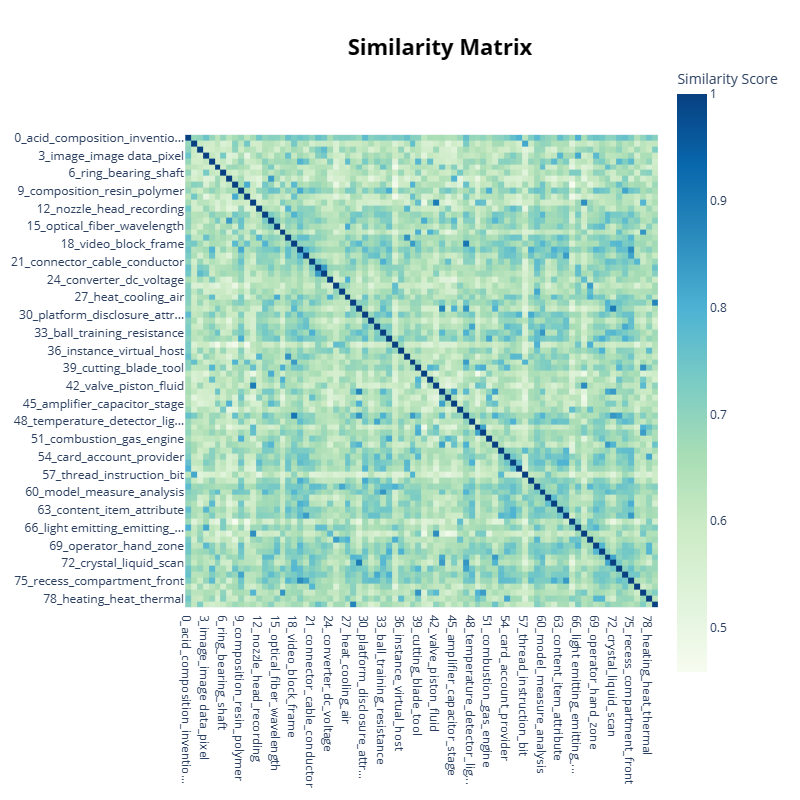

In [6]:
# set diversity
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

#HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=15, min_samples = 10, metric='euclidean', cluster_selection_method='eom', prediction_data=True)


#CountVectorizer
vectorizer_model = CountVectorizer(max_features=1_000, min_df=10, ngram_range=(1, 3))

#c-TF-IDF
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

#Run Model
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model,
                       diversity=0.8)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df['Lemmatization']) 

topic_model.get_topic_info()[1:11]

,Topic,Count,Name
1,0,332,0_compound_cell_sequence_thereof
2,1,289,1_chip_insulating_substrate_transistor
3,2,227,2_equipment_access_frequency_transmit
4,3,202,3_image data_view_conversion_unit configured
5,4,188,4_proximal_distal end_valve_instrument
6,5,133,5_vibration_score_coil_parameter
7,6,109,6_ring_shaft_circumferential_annular
8,7,96,7_fiber_sub sub sub_matrix_cavity
9,8,83,8_seat_slide_rod_panel
10,9,77,9_sup sup_adhesive_property_covering


In [8]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,2954,-1_magnetic_processor_water_storage
1,0,332,0_compound_cell_sequence_thereof
2,1,289,1_chip_insulating_substrate_transistor
3,2,227,2_equipment_access_frequency_transmit
4,3,202,3_image data_view_conversion_unit configured
...,...,...,...
76,75,15,75_recess_outer surface_article_training
77,76,15,76_radiation_optical_configured receive_carbon
78,77,15,77_sensor_status_property_also include
79,78,15,78_heating_may comprise_generating_treatment


In [19]:
#topic_model.visualize_heatmap()

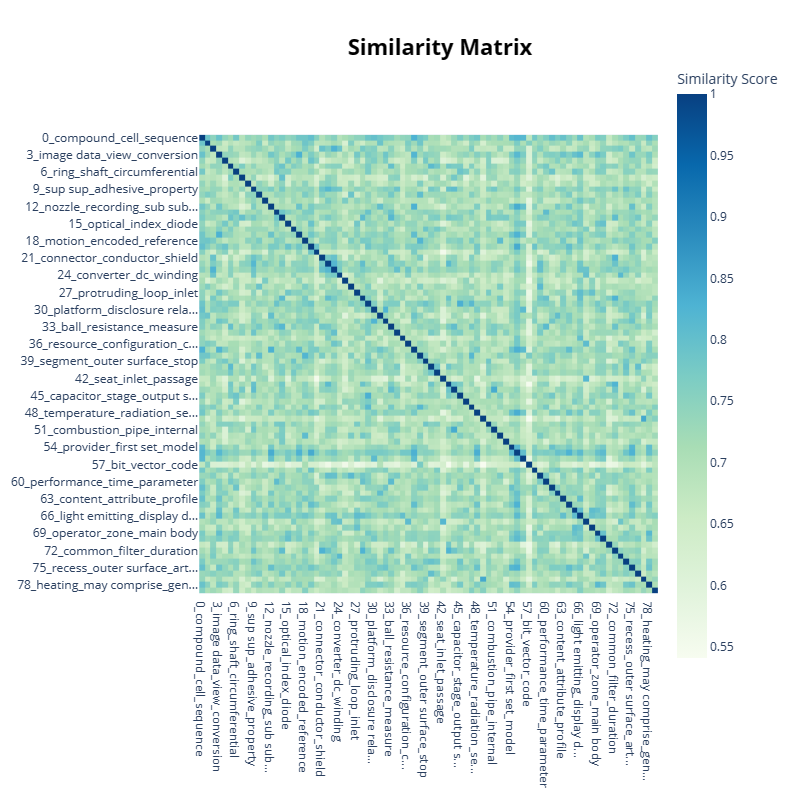